In [2]:
import pandas as pd
data  = pd.read_csv('all_training_logs_in_one_file.csv')

# sample data
data.head()

,metric,value,step
0,lr-AdamW,0.000030,49.0
1,lr-AdamW,0.000030,99.0
2,lr-AdamW,0.000030,149.0
3,lr-AdamW,0.000030,199.0
4,lr-AdamW,0.000015,249.0


In [3]:
type(data)

pandas.core.frame.DataFrame

**First tf logs: 0 - 5359**

**Second tf logs: 5360 - 15944**

**Third tf logs: 15945 - 21334**

In [4]:
# first tf logs
data1 = data.iloc[0:5360]
print(data1.shape[0])
data1.head()

# last step: 9049 (except validation) / val last step: 2223

5360


,metric,value,step
0,lr-AdamW,0.000030,49.0
1,lr-AdamW,0.000030,99.0
2,lr-AdamW,0.000030,149.0
3,lr-AdamW,0.000030,199.0
4,lr-AdamW,0.000015,249.0


In [5]:
# second tf logs
data2 = data.iloc[5360:15945]
print(data2.shape[0])
data2.head()

10585


,metric,value,step
5360,lr-AdamW,0.000030,49.0
5361,lr-AdamW,0.000030,99.0
5362,lr-AdamW,0.000030,149.0
5363,lr-AdamW,0.000030,199.0
5364,lr-AdamW,0.000015,249.0


In [6]:
data2.loc[data2['metric'].str.contains("val|acc_epoch|acc_top5_epoch")==False, 'step'] += 9050
data2.loc[data2['metric'].str.contains("val_acc_step|val_acc_top5_step"), 'step'] += 2224
data2.head()

/home/thisiswooyeol/anaconda3/envs/pytorchvideo/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,metric,value,step
5360,lr-AdamW,0.000030,9099.0
5361,lr-AdamW,0.000030,9149.0
5362,lr-AdamW,0.000030,9199.0
5363,lr-AdamW,0.000030,9249.0
5364,lr-AdamW,0.000015,9299.0


In [7]:
# third tf logs
data3 = data.iloc[15945:21334]
print(data3.shape[0])
data3.head()

5389


,metric,value,step
15945,lr-AdamW,0.000030,49.0
15946,lr-AdamW,0.000030,99.0
15947,lr-AdamW,0.000030,149.0
15948,lr-AdamW,0.000030,199.0
15949,lr-AdamW,0.000015,249.0


In [8]:
data3.loc[data3['metric'].str.contains("val|acc_epoch|acc_top5_epoch")==False, 'step'] += 25800
data3.loc[data3['metric'].str.contains("val_acc_step|val_acc_top5_step"), 'step'] += 6672
data3.head()

/home/thisiswooyeol/anaconda3/envs/pytorchvideo/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,metric,value,step
15945,lr-AdamW,0.000030,25849.0
15946,lr-AdamW,0.000030,25899.0
15947,lr-AdamW,0.000030,25949.0
15948,lr-AdamW,0.000030,25999.0
15949,lr-AdamW,0.000015,26049.0


In [9]:
data.iloc[15945]

metric    lr-AdamW
value      0.00003
step       25849.0
Name: 15945, dtype: object

In [10]:
# plottable columns
# : lr-AdamW, train_loss, train_acc_step, train_acc_top5_step, val_acc_step, val_acc_top5_step

import matplotlib.pyplot as plt

### Plot lr-AdamW

In [11]:
lr_AdamW = data[data['metric'].str.contains("lr-AdamW")]
lr_AdamW.head()

,metric,value,step
0,lr-AdamW,0.000030,49.0
1,lr-AdamW,0.000030,99.0
2,lr-AdamW,0.000030,149.0
3,lr-AdamW,0.000030,199.0
4,lr-AdamW,0.000015,249.0


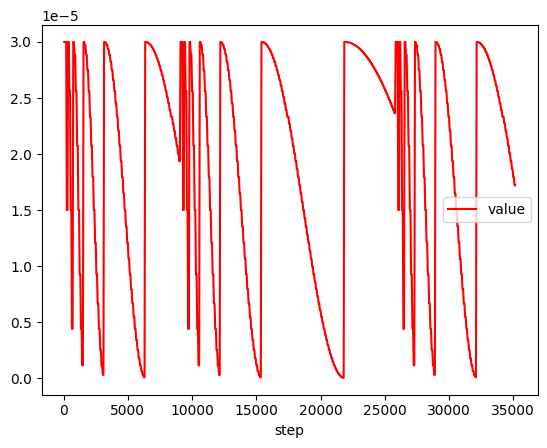

In [12]:
lr_AdamW.plot(kind='line',x='step',y='value',color='red')
plt.show()

## Plot train loss

In [13]:
train_loss = data[data['metric'].str.contains("train_loss", regex=True)]
train_loss

,metric,value,step
181,train_loss,2.409097,49.0
182,train_loss,2.088907,99.0
183,train_loss,2.339890,149.0
184,train_loss,2.409298,199.0
185,train_loss,1.989131,249.0
...,...,...,...
16314,train_loss,1.100301,34949.0
16315,train_loss,0.902165,34999.0
16316,train_loss,1.100485,35049.0
16317,train_loss,1.095978,35099.0


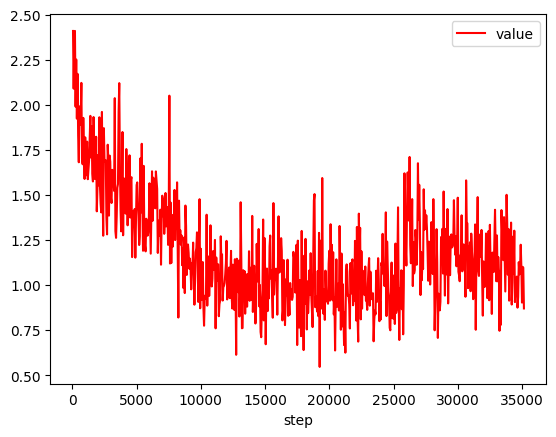

In [14]:
train_loss.plot(kind='line',x='step',y='value',color='red')
plt.show()

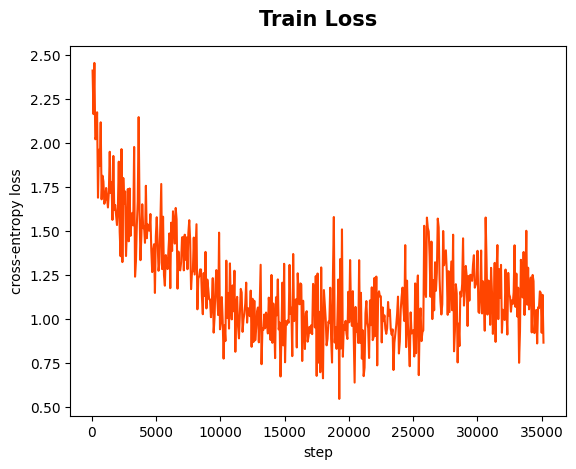

In [17]:
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

xnew = np.linspace(49, 35150, 500)

spl = make_interp_spline(train_loss['step'], train_loss['value'], k=3)  # type: BSpline
train_loss_smooth = spl(xnew)

plt.plot(xnew, train_loss_smooth, color='orangered')
plt.title('Train Loss', fontdict={'fontsize': 15, 'fontweight': 'bold'}, pad=15)
plt.xlabel('step')
plt.ylabel('cross-entropy loss')

plt.savefig('Hagrid_checkpoint_231210/train_loss.svg', format='svg')
plt.show()

## Plot train accuracy step

In [19]:
train_acc_step = data[data['metric'].str.contains("train_acc_step", regex=True)]
train_acc_step

,metric,value,step
362,train_acc_step,0.187500,49.0
363,train_acc_step,0.333333,99.0
364,train_acc_step,0.270833,149.0
365,train_acc_step,0.250000,199.0
366,train_acc_step,0.312500,249.0
...,...,...,...
16501,train_acc_step,0.604167,34949.0
16502,train_acc_step,0.729167,34999.0
16503,train_acc_step,0.520833,35049.0
16504,train_acc_step,0.645833,35099.0


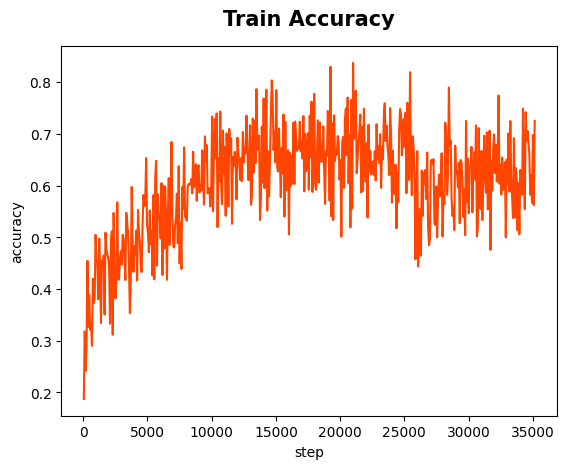

In [20]:
xnew = np.linspace(49, 35150, 500)

spl = make_interp_spline(train_acc_step['step'], train_acc_step['value'], k=3)  # type: BSpline
train_acc_smooth = spl(xnew)

plt.plot(xnew, train_acc_smooth, color='orangered')
plt.title('Train Accuracy', fontdict={'fontsize': 15,'fontweight': 'bold'}, pad=15)
plt.xlabel('step')
plt.ylabel('accuracy')

plt.savefig('Hagrid_checkpoint_231210/train_acc_step.svg', format='svg')
plt.show()

## Plot train_acc_top5_step

In [21]:
train_acc_top5_step = data[data['metric'].str.contains("train_acc_top5_step", regex=True)]
train_acc_top5_step

,metric,value,step
543,train_acc_top5_step,0.625000,49.0
544,train_acc_top5_step,0.687500,99.0
545,train_acc_top5_step,0.583333,149.0
546,train_acc_top5_step,0.583333,199.0
547,train_acc_top5_step,0.770833,249.0
...,...,...,...
16688,train_acc_top5_step,0.937500,34949.0
16689,train_acc_top5_step,0.916667,34999.0
16690,train_acc_top5_step,0.895833,35049.0
16691,train_acc_top5_step,0.958333,35099.0


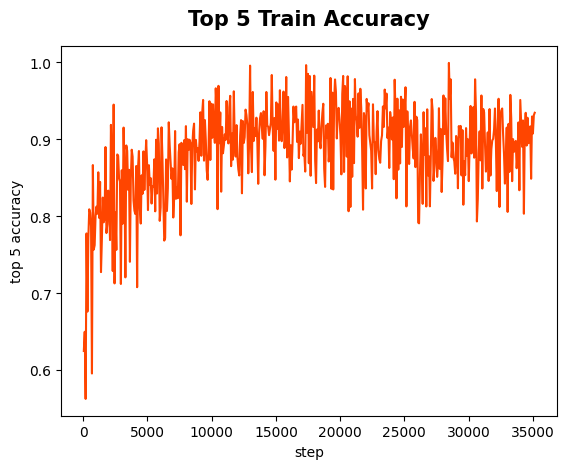

In [22]:
xnew = np.linspace(49, 35150, 500)

spl = make_interp_spline(train_acc_top5_step['step'], train_acc_top5_step['value'], k=3)  # type: BSpline
train_acc_top5_smooth = spl(xnew)

plt.plot(xnew, train_acc_top5_smooth, color='orangered')
plt.title('Top 5 Train Accuracy', fontdict={'fontsize': 15,'fontweight': 'bold'}, pad=15)
plt.xlabel('step')
plt.ylabel('top 5 accuracy')

plt.savefig('Hagrid_checkpoint_231210/train_acc_top5_step.svg', format='svg')
plt.show()

## Plot val_acc_step

In [23]:
val_acc_step = data[data['metric'].str.contains("val_acc_step", regex=True)]
val_acc_step[-2224:]

,metric,value,step
16882,val_acc_step,0.791667,6672.0
16883,val_acc_step,0.770833,6673.0
16884,val_acc_step,0.812500,6674.0
16885,val_acc_step,0.854167,6675.0
16886,val_acc_step,0.833333,6676.0
...,...,...,...
19101,val_acc_step,0.562500,8891.0
19102,val_acc_step,0.583333,8892.0
19103,val_acc_step,0.687500,8893.0
19104,val_acc_step,0.666667,8894.0


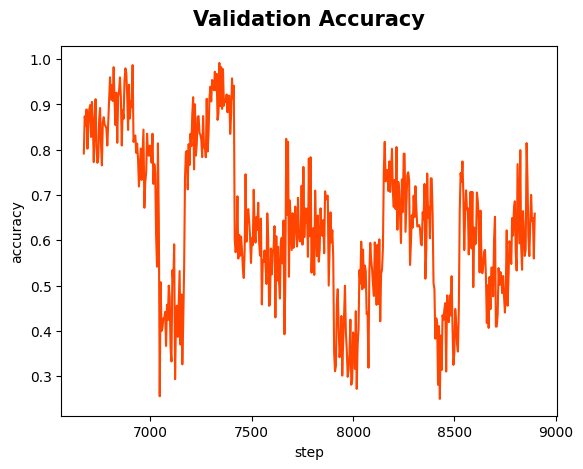

In [25]:
xnew = np.linspace(6672, 8896, 500)

spl = make_interp_spline(val_acc_step['step'], val_acc_step['value'], k=3)  # type: BSpline
val_acc_step_smooth = spl(xnew)

plt.plot(xnew, val_acc_step_smooth, color='orangered')
plt.title('Validation Accuracy', fontdict={'fontsize': 15,'fontweight': 'bold'}, pad=15)
plt.xlabel('step')
plt.ylabel('accuracy')

plt.savefig('Hagrid_checkpoint_231210/val_acc_step.svg', format='svg')
plt.show()

## Plot val_acc_top5_step

In [26]:
val_acc_top5_step = data[data['metric'].str.contains("val_acc_top5_step", regex=True)]
val_acc_top5_step[-2224:]

,metric,value,step
19106,val_acc_top5_step,0.979167,6672.0
19107,val_acc_top5_step,0.958333,6673.0
19108,val_acc_top5_step,0.916667,6674.0
19109,val_acc_top5_step,0.979167,6675.0
19110,val_acc_top5_step,1.000000,6676.0
...,...,...,...
21325,val_acc_top5_step,0.895833,8891.0
21326,val_acc_top5_step,0.979167,8892.0
21327,val_acc_top5_step,0.937500,8893.0
21328,val_acc_top5_step,0.875000,8894.0


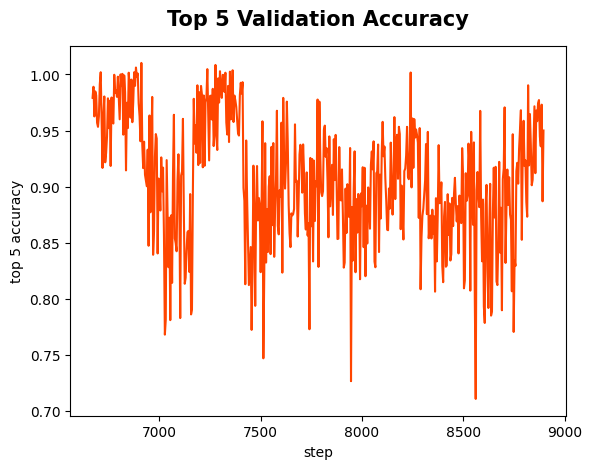

In [27]:
xnew = np.linspace(6672, 8895, 500)

spl = make_interp_spline(val_acc_top5_step['step'], val_acc_top5_step['value'], k=3)  # type: BSpline
val_acc_top5_step_smooth = spl(xnew)

plt.plot(xnew, val_acc_top5_step_smooth, color='orangered')
plt.title('Top 5 Validation Accuracy', fontdict={'fontsize': 15,'fontweight': 'bold'}, pad=15)
plt.xlabel('step')
plt.ylabel('top 5 accuracy')

plt.savefig('Hagrid_checkpoint_231210/val_acc_top5_step.svg', format='svg')
plt.show()